# Les algorithmes de classification

## Classification naïve bayésienne (Naive Bayes)

L'algorithme Naive Bayes est un classifieur probabiliste basé sur **le théorème de Bayes** et **l'hypothèse d'indépendance des variables**. Il suppose que la présence d'une caractéristique particulière dans une classe donnée est indépendante de la présence de toute autre caractéristique.


- **Le théorème de Bayes** est une formule mathématique qui permet de calculer la probabilité d'un événement en fonction de probabilités conditionnelles.


- **L'hypothèse d'indépendance des variables** signifie que l'algorithme suppose que les valeurs de chaque attribut sont indépendantes les unes des autres.

Relativement simple, il donne souvent de bons résultats.

Le théorème de Bayes est un résultat fondamental en probabilités qui relie la probabilité conditionnelle d'un événement A sachant un événement B.

$$
p(Y|X) = \frac{p(\text{X}|\text{Y}) p(\text{Y})}{p(\text{X})}
$$

où :

- $p(\text{Y}|\text{X})$ est la probabilité conditionnelle de Y sachant X, c'est-à-dire la probabilité que l'événement Y se produise sachant que l'événement X s'est déjà produit.
- $p(\text{X}|\text{Y})$ est la probabilité conditionnelle de X sachant Y.
- $p(\text{Y})$ est la probabilité que l'événement Y se produise.
- $p(\text{X})$ est la probabilité que l'événement X se produise.

Exemple : $p(\text{« le patient va guérir »}|\text{« il a pris le médicament »})$

### Cas des attributs discrets

Dans le cas de la classification, nous cherchons à prédire la classe d'un objet en fonction de ses caractéristiques. Nous cherchons donc à calculer la probabilité que l'objet appartienne à une classe donnée sachant ses caractéristiques.

Pour plus de clarté, prenons l'exemple suivant. Nous avons un jeu de données de patients avec des informations sur leur taille et le poids, et nous voulons prédire le genre du patient.

| Taille | Poids | Genre |
| --- | --- | --- |
| Grand | Lourd | H |
| Grand | Lourd | H |
| Petit | Lourd | H |
| Grand | Lourd | H |
| Petit | Léger | F |
| Petit | Lourd | F |
| Petit | Léger | F |
| Grand | Léger | F |

Un nouveau patient arrive, il est grand et lourd. Nous voulons prédire son genre. On a les caractéristiques $X = [\text{Taille} = \text{"Petit"}, \text{Poids} = \text{"Lourd"}]$. On va calculer les probabilités que le patient soit un homme et une femme ($p(\text{F}|\text{X})$ et $p(\text{H}|\text{X})$) et on va choisir la classe avec la probabilité la plus élevée pour ce nouveau patient. Commençons par calculer la probabilité $p(\text{F}|\text{X})$.

En se basant sur le théorème de Bayes, on a besoin de calculer $p(\text{X}|\text{F})$ où $X = \{x_{1} = \text{"Petit"}, x_{2} = \text{"Lourd"}\}$. C'est à ce moment que **l'hypothèse d'indépendance des variables** intervient. On suppose que la taille et le poids sont indépendants.

$$
\begin{align}
p(\text{X}|\text{F}) &= p(\text{Taille} = \text{"Petit"}|\text{F}) \times p(\text{Poids} = \text{"Lourd"}|\text{F}) \\
&= \frac{3}{4} \times \frac{1}{4} \\ 
&= \frac{3}{16}
\end{align}
$$

On a $p(\text{F}) = \frac{1}{2}$ et pour $p(\text{X})$ on utilise de nouveau **l'hypothèse d'indépendance des variables**.
$$
\begin{align}
p(\text{X}) &= p(\text{Taille} = \text{"Petit"}) \times p(\text{Poids} = \text{"Lourd"}) \\
&= \frac{4}{8} \times \frac{4}{8} \\
&= \frac{1}{2}
\end{align}
$$

On peut finalement calculer $p(\text{F}|\text{X})$.

$$
p(\text{F}|\text{X}) = \frac{p(\text{X}|\text{F}) \times p(\text{F})}{p(\text{X})} = \frac{\frac{3}{16} \times \frac{1}{2}}{\frac{1}{2}} = \frac{3}{16}
$$

### Cas des attributs continus

Estimer les probabilités sur des attributs continus est plus complexe. Il y a alors deux possibilités.



- **Discrétisation des attributs continus** : on peut discrétiser les attributs continus en attributs discrets.

| Taille |
| --- |
| 1.84 |
| 1.58 |
| 1.47 |
| 1.79 |

On peut discrétiser les valeurs en utilisant des seuils. Les valeurs deviennent alors les suivantes.


| Taille |
|--------|
| Grand  |
| Petit  |
| Petit  |
| Grand  |

une fois la discrétisation effectuée, on peut appliquer la méthode précédente.


- **Utilisation de la distribution normale** : on peut supposer que les attributs continus suivent une distribution normale (Gaussienne). On calcule alors la moyenne et l'écart-type de la distribution et on peut ainsi en déduire la probabilité d'une valeur donnée.

Formule de la distribution normale :
$$
p(x_{i}|\text{Y}) = \frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{(x_{i} - \mu)^{2}}{2\sigma}}
$$

Distribution normale.
<img src="images/01-gaussian-distribution.png">

En résumé, l’algorithme Naive Bayes :
- Fonctionne sur un principe simple mais efficace dans de nombreux cas
- Peut même gérer des attributs avec des valeurs nulles, en les ignorant dans le calcul de probabilité
- N’est pas sensible aux anomalies
- N’est pas sensible aux attributs inutiles
- Ne fonctionne que pour des données qui ne sont pas corrélées
- C’est un des rares algorithmes déterministes

### Implémentation avec Scikit-learn

Il existe plusieurs implémentations de l'algorithme Naive Bayes dans sklearn.naive_bayes :

https://scikit-learn.org/stable/modules/naive_bayes.html

- **GaussianNB** : calcul des probabilités basé sur une distribution normale des données

- **MultinomialNB** : utile pour classification de textes

- **ComplementNB** : variante du précédent, adapté lorsque les classes sont inégales

- **BernoulliNB** : comme GaussianDB, mais avec une distribution des données selon la loi de Bernouilli

- **CategoricalNB** : adapté lorsque toutes les variables sont catégorielles

Les données Iris sont continues, et suivent globalement une distribution normale. Voici une visualisation permettant de s'en assurer.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
 
# Chargement du dataset Iris
X, y = load_iris(return_X_y=True, as_frame=True)
 
# Création des jeux d'entraînements et de tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

C:\Users\bvannier2021\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bvannier2021\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bvannier2021\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bvannier2021\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

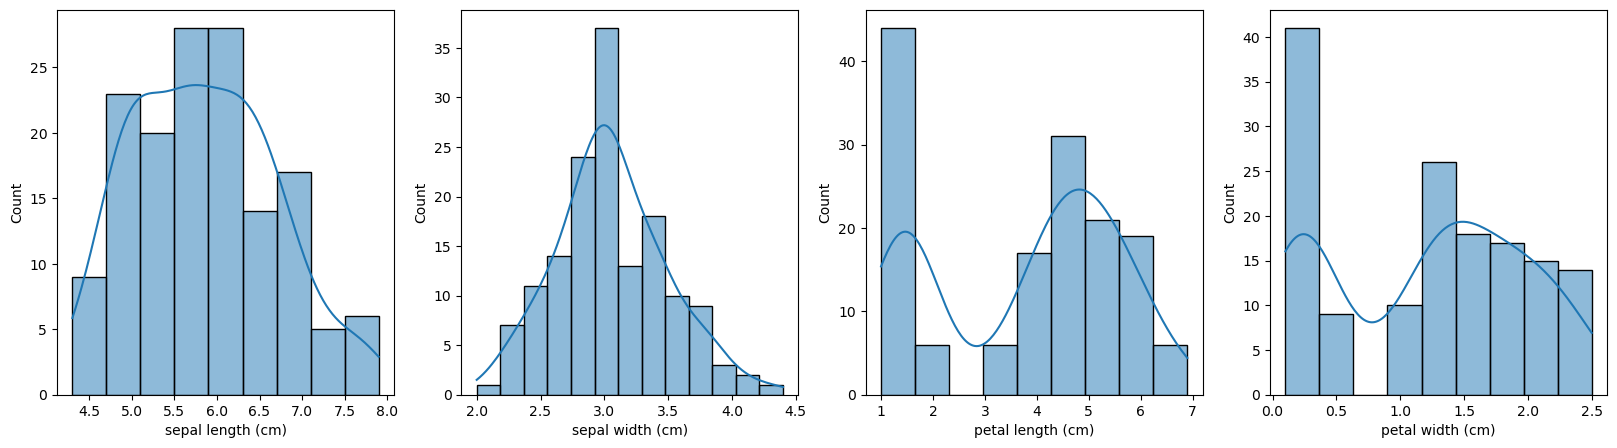

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
 
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
index = 0
for column in X.columns:
    sns.histplot(X, x=column, ax=axes[index], kde = True)
    index += 1

In [25]:
from sklearn.naive_bayes import GaussianNB
 
# Création du modèle gaussien
gnb = GaussianNB()
 
# Entrainement du modèle grâce aux données
gnb.fit(X_train, y_train)
 
# Test du modèle
print("Accuracy :", gnb.score(X_test, y_test))

Accuracy : 0.9666666666666667


## Méthode des plus proches voisins (K Nearest Neighbors - KNN)

L'algorithme k-plus proches voisins (KNN) est une méthode de classification supervisée utilisée en apprentissage automatique. Le principe de base de cet algorithme est de classer une nouvelle donnée en fonction des $K$ données les plus proches de celle-ci dans l'espace d'attributs.

Pour utiliser l'algorithme KNN, il faut tout d'abord définir la valeur de $K$, qui représente le nombre de voisins à prendre en compte pour la classification. Ensuite, pour chaque nouvelle donnée à classer, on calcule la distance entre cette donnée et toutes les données d'entraînement disponibles. Les $K$ données les plus proches sont alors sélectionnées, et la classe majoritaire parmi ces $K$ voisins est attribuée à la nouvelle donnée.

KNN
<img src="images/02-knn.png">

Pour utiliser l'algorithme KNN, il est nécessaire de pouvoir calculer une distance entre deux points dans l'espace d'attributs. Les coordonnées des points sont utilisées pour calculer cette distance.

| Point | $X_{1}$ | $X_{2}$ |
|-------|---------|---------|
| 1     | 1       | 5       |
| 2     | 2       | 5       |
| 3     | 1       | 3       |
| 4     | 3       | 4       |
| 5     | 4       | 4       |
| 6     | 2       | 2       |
| 7     | 3       | 2       |
| 8     | 4       | 2       |
| 9     | 5       | 3       |
| 10    | 5       | 1       |
| ?     | 3.5     | 3       |



Il existe plein de formules pour calculer la distance entre deux points. Soit $A$ un point de coordonnées dans un espace à $N$ dimension tel que $A = \{a_{1} , a_{2}, \ldots , a_{N}$\} et $B$ un point de coordonnées dans le même espace tel quel $B = \{b_{1} , b_{2} , \ldots , b_{n}\}$.

- Distance de Manhattan :

$$
d(A, B) = \sum_{i=1}^{N} |a_{i} - b_{i}|
$$

- Distance euclidienne (dimension 2) :

$$
d(A, B) = \sqrt{\sum_{i=1}^{N} (a_{i} - b_{i})^{2}}
$$

- Distance de Minkowski (dimension $p$) :

$$
d(A, B) = \left( \sum_{i=1}^{N} |a_{i} - b_{i}|^{p} \right)^{\frac{1}{p}}
$$

Sur ces calculs de distance, la normalisation des données est souvent cruciale, sinon une donnée avec de grandes valeurs prend bien plus d’importance dans le
calcul, par rapport aux autres données.

On peut alors construire une matrice symétrique des distances entre chaque point. Si on prend l'exemple des points ci-dessus et qu'on utilise la distance euclidienne, on obtient la matrice suivante.

Matrice de distance euclidienne
<img src="images/03-euclidian-distance-matrix.png">

La majorité des 5 plus proches voisins ($K = 5$) appartient à la classe A, donc le point ? est classé dans la classe A.

Le choix de la valeur de k dans l'algorithme des $K$ plus proches voisins (KNN) est crucial pour obtenir de bons résultats. Si $K$ est trop petit, l'algorithme sera sensible au bruit dans les données, ce qui peut entraîner des erreurs de classification. D'autre part, si $K$ est trop grand, le voisinage ne sera pas représentatif des données locales, ce qui peut également entraîner des erreurs.

Pour déterminer la valeur optimale de $K$, on utilise généralement une méthode d'essai et d'erreur en évaluant les performances de l'algorithme pour différentes valeurs de $K$ et en choisissant celle qui minimise l'erreur de classification. Cette approche est similaire à celle utilisée pour d'autres algorithmes d'apprentissage automatique.

### Implémentation avec Scikit-learn

In [12]:
from sklearn.metrics import pairwise_distances
import pandas as pd

# On définit un nombre de points
X = [[1,5],[2,5],[1,3],[3,4],[4,4],[2,2],[3,2],[4,2],[5,3],[5,1],[3.5,3]]

# On calcule la matrice des distances
matrix_distances = pd.DataFrame(pairwise_distances(X))
matrix_distances

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,1.000000,2.000000,2.236068,3.162278,3.162278,3.605551,4.242641,4.472136,5.656854,3.201562
1,1.000000,0.000000,2.236068,1.414214,2.236068,3.000000,3.162278,3.605551,3.605551,5.000000,2.500000
2,2.000000,2.236068,0.000000,2.236068,3.162278,1.414214,2.236068,3.162278,4.000000,4.472136,2.500000
3,2.236068,1.414214,2.236068,0.000000,1.000000,2.236068,2.000000,2.236068,2.236068,3.605551,1.118034
4,3.162278,2.236068,3.162278,1.000000,0.000000,2.828427,2.236068,2.000000,1.414214,3.162278,1.118034
5,3.162278,3.000000,1.414214,2.236068,2.828427,0.000000,1.000000,2.000000,3.162278,3.162278,1.802776
6,3.605551,3.162278,2.236068,2.000000,2.236068,1.000000,0.000000,1.000000,2.236068,2.236068,1.118034
7,4.242641,3.605551,3.162278,2.236068,2.000000,2.000000,1.000000,0.000000,1.414214,1.414214,1.118034
8,4.472136,3.605551,4.000000,2.236068,1.414214,3.162278,2.236068,1.414214,0.000000,2.000000,1.500000
9,5.656854,5.000000,4.472136,3.605551,3.162278,3.162278,2.236068,1.414214,2.000000,0.000000,2.500000


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Création d'un modèle KNN
# La distance euclidienne est la distance de Minkowski dans un espace à 2 dimensions
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# On entraîne le modèle avec les données Iris
knn.fit(X_train, y_train)

# On affiche la métrique `Accuracy`
print("Accuracy :", knn.score(X_test, y_test))

Accuracy : 0.96


En résumé, KNN :
- Fonctionne sur un principe intuitif
- Nécessite peu de paramètres
- Peut-être couteux en temps de calcul en raison de la matrice des distances
- Est très sensible aux plages de données des différents attributs

## Machines à vecteurs de support (Support Vector Machine - SVM)

L'algorithme SVM (Support Vector Machine) est utilisé pour la classification de données. Son objectif est de trouver un hyperplan qui sépare au mieux les deux classes. Dans un espace à deux dimensions, cet hyperplan est simplement une droite qui sépare les points des deux classes.

Exemples d'hyperplans pour un jeu de données.

<img src="images/04-svm.png">

On voit qu'il existe de nombreuses possibilités pour les hyperplans. Pour choisir le meilleur, nous allons sélectionner celui qui maximise les marges.

Maximisation des marges.

<img src="images/05-maximized-hyperplans.png">

Le choix de l’hyperplan qui maximise les marges est un problème d’optimisation sous contraintes, sa résolution est au-delà des attendus de ce cours.

Pour classer un nouveau point à l'aide d'un algorithme SVM, une fois que l'hyperplan séparateur a été déterminé, il suffit de vérifier de quel côté de l'hyperplan se trouve le nouveau point. Si le point est du même côté que les points positifs de l'ensemble d'entraînement, il est classé comme positif. S'il est du même côté que les points négatifs, il est classé comme négatif.

Toutes les données ne sont pas linéairement séparables, c'est-à-dire qu'il n'existe pas d'hyperplan qui puisse séparer parfaitement les deux classes. Dans ce cas, l'algorithme SVM utilise une fonction de noyau (kernel) pour transformer les données dans un espace de dimension supérieure où elles deviennent linéairement séparables.

En résumé, SVM :
- Est une résolution d’un problème d’optimisation
- Est un algorithme efficace
- N’est pas perturbé par les anomalies
- A peu de risques de surapprentissage
- N’est pas sensible aux données corrélées
- N’est pas adapté en cas de données manquantes
- Est plus adapté pour les attributs continus

### Implémentation avec Scikit-learn

Il existe de nombreuses implémentations de SVM avec Scikit-learn. Pour la classification, l’algorithme Support Vector Classification est adapté, et permet de
varier les noyaux utilisés pour s’adapter aux différentes données. Pour en savoir plus sur les différents types de noyau, il faut se référer à la documentation de Scikit-learn.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC


In [15]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print("Accuracy :", svm.score(X_test, y_test))

Accuracy : 0.9466666666666667


## Les réseaux de neurones (Artificial Neural Networks - ANN)

Les réseaux de neurones sont une classe d'algorithmes d'apprentissage automatique inspirés par l'architecture et le fonctionnement du cerveau humain. Ils sont composés de nombreux neurones artificiels interconnectés, qui fonctionnent ensemble pour traiter des informations complexes.

Lorsqu'une information arrive dans le réseau, elle est transmise à travers les connexions entre les neurones, déclenchant ou non leur activation. Les neurones activés envoient ensuite des signaux à d'autres neurones, créant ainsi un réseau complexe de traitement de l'information

Les réseaux de neurones sont très utilisés dans de nombreuses applications, telles que la reconnaissance d'images, la reconnaissance vocale, la traduction automatique, et bien d'autres encore. Ils sont capables d'apprendre à partir de grandes quantités de données et de généraliser leurs connaissances à de nouvelles données. Cependant, leur entraînement peut être très coûteux en termes de temps et de ressources informatiques.

L'idée sous-jacente de l’algorithme est de créer une fonction complexe non-linéaire, en combinant plusieurs unités de calcul simple appelées neurones.
Les réseaux de neurones sont constitués de plusieurs composants principaux.

- Les **neurones** qui correspondent aux unités de calculs
- Les **connexions** entre les neurones qui transmettent et propagent un signal
- Le **poids** de chaque connexion qui traduisent la force et l’importance de la connexion

La structure la plus simple du réseau de neurone est le **perceptron**.

### Le perceptron

Le perceptron.

<img src="images/06-perceptron.png">

Il y a trois étapes majeures dans le fonctionnement d’un perceptron.

1. **Pondération des valeurs** : Les valeurs en entrées sont pondérées par des poids, qui seront appris par le modèle.
2. **Fonction de combinaison** : Toutes les valeurs calculées dans l'étape 1 sont sommées. 
$$
c = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + \ldots + w_{n}x_{n}$
$$
3. **Fonction d'activation** : Déclenche ou non un signal en fonction du résultat de la fonction de combinaison.

Il existe plusieurs fonctions d'activation. Pour ce cours, nous prendrons la fonction suivante.

$$
\phi(c) = \left\{
    \begin{array}{ll}
        1 & \mbox{si } c \gt 0 \\
        -1 & \mbox{sinon}
    \end{array}
\right\}
$$


Le processus d'apprentissage du perceptron est itératif et se déroule en plusieurs étapes :

1. **Initialisation** : les poids des connexions entre les neurones sont initialisés à des valeurs aléatoires.

$$
(w_{1}, w_{2}, \ldots, w_{n})
$$

2. **Prédiction** : le perceptron calcule la sortie pour chaque exemple d'entraînement en utilisant les poids actuels. Pour chaque donnée du jeu d'entraînement $(X_{i}, y_{i})$ on calcule la valeur prédite $\hat{y_{i}}$
3. **Mise à jour des poids** : si la prédiction est incorrecte, les poids des connexions sont ajustés en fonction de l'erreur de prédiction.

$$
w_{j}^{(k+1)} = w_{j}^{k} + \lambda(y_{i} - \hat{y_{i}}^{k})x_{ij}
$$

Où $k$ représente le numéro de l'itération, $j$ est le numéro du poids à ajuster, $\lambda$ est le taux d'apprentissage et $x_{ij}$ représente la valeur sur la $j$-ème valeur en entrée du neuron ($j$-ème coordonnée de $X_{i}$).

Quelle est l'intuition derrière la mise à jour des poids ? L'idée est de mettre à jour le nouveau poids en fonction de la prédiction.
1. S'il n'y a pas d'erreur, le poids reste le même. 
$$
y_{i} = \hat{y_{i}} \qquad \Rightarrow \qquad w_{j}^{(k+1)} = w_{j}^{k}
$$
2. Si la valeur d'entraînement est supérieur à la valeur prédite ($y_{i} > \hat{y_{i}}$), on augmente le poids pour augmenter le poids et se rapprocher de la valuer réelle.
3. Si la valeur d'entraînement est inférieur à la valeur prédite ($y_{i} < \hat{y_{i}}$), on diminue le poids pour diminuer la valeur prédite.

C'est ce qu'on appelle la **rétropropagation de l'erreur**.

Exemple de calcul des poids.

<img src="images/07-weights.png">

#### Le taux d'apprentissage

Le taux d'apprentissage $\lambda$ est un paramètre essentiel du calcul du poids.
1. Il permet de gérer l'amplitude de mise à jour des poids
2. Il a pour objectif de permettre de converger vers un réseau idéal
3. Il est un paramètre très important à régler, car il peut avoir un fort impact sur les performances du modèle

Le taux de convergence.

<img src="images/08-learning-rate.png">

#### Les fonctions d'activation

Il existe de nombreuses fonctions d'activation différentes. Pour le perceptron, nous avons utilisé une fonction d'activation signe qui renvoie 1 si la somme des entrées pondérées est supérieure à 0, et -1 sinon.

Les différentes fonctions d'activation.

<img src="images/09-activation-function.png">

### Les réseaux de neurones

Les réseaux de neurones multicouches (ou réseaux de neurones profonds) sont une extension des réseaux de neurones simples, tels que le perceptron. Ils sont composés de plusieurs couches de neurones, chacune prenant ses entrées sur les sorties de la précédente.

Les réseaux de neurones. Un rond vert représente un neurone.

<img src="images/10-neural-network.png">

#### La rétropropagation de l'erreur

Pour propager l'erreur finale en sortie aux différents poids des couches cachées, on utilise la méthode de rétropropagation de l'erreur. Cette méthode consiste à remonter dans les couches du réseau de neurones, à partir de la sortie. La rétropropagation de l'erreur utilise la méthode de descente du gradient pour ajuster les poids des connexions entre les neurones. Cette méthode consiste à itérer sur les poids en utilisant la dérivée partielle de l'erreur par rapport à chaque poids pour déterminer la direction de la mise à jour. Les poids sont alors ajustés dans la direction opposée à la dérivée partielle pour minimiser l'erreur.

La rétropropagation de l'erreur.

<img src="images/11-retropropagation.png">

#### L'architecture des réseaux de neurones

Lors de la création d'un réseau de neurones, il y a plusieurs choix à faire pour définir son architecture. Tout d'abord, le **nombre d'entrées** dépend du nombre d'attributs dans les données d'entrainement. Pour chaque attribut binaire ou continu, il y aura une entrée correspondante. Pour un attribut catégoriel avec $k$ valeurs possibles, il y aura $k$ entrées correspondantes.

Ensuite, le **nombre de sorties** dépend du type de problème à résoudre. Dans le cas d'une classification binaire, il n'y aura qu'une seule sortie. Dans le cas d'une classification multiclasse, il y aura autant de sorties que de classes à prédire.

Le **nombre de couches cachées** et le nombre de neurones par couche sont des choix importants qui dépendent de la complexité du problème à résoudre. Plus il y a de couches et de neurones, plus le réseau sera capable de modéliser des relations complexes entre les données d'entrée et de sortie, mais plus il sera long à entrainer et plus il risque de sur-apprendre les données d'entrainement.

Enfin, il y a plusieurs paramètres à régler pour l'algorithme d'apprentissage, tels que le **taux d'apprentissage** et le **nombre d'itérations**. Ces paramètres peuvent avoir un impact important sur les performances du réseau de neurones.

#### Le deep learning

La technique d'apprentissage automatisée la plus mise en avant ces derniers est le **deep learning**. C'est une technique qui utilise des réseaux de neurones avec au moins 5 à 10 couches cachées. Cette méthode nécessite une grande puissance de calcul et des jeux de données importants pour obtenir des résultats précis.

Une tendance actuelle dans le domaine du deep learning est l'utilisation de **réseaux pré-entraînés**. Cette approche consiste à entraîner un réseau sur une tâche spécifique, puis à utiliser ce réseau entraîné comme base pour une autre tâche. Cela permet de gagner du temps et d'améliorer les performances, car il n'est plus nécessaire de d'entraîner à nouveau le réseau à partir de zéro pour chaque nouvelle tâche.

#### Les familles de réseaux de neurones

Le domaine des réseaux de neurones est vaste et comprend plusieurs types de réseaux spécialisés pour différents types de tâches. 

1. Les **réseaux à convolution** sont couramment utilisés pour le traitement d'images et de vidéos. 
2. Les **réseaux récurrents** sont utilisés pour traiter des séquences, comme dans le cas du traitement du langage naturel. 
3. Les **auto-encodeurs** sont utilisés pour l'apprentissage non supervisé de caractéristiques à partir de données non étiquetées. 
4. Les **réseaux LSTM** (Long Short-Term Memory) sont un type de réseau récurrent qui est capable de mémoriser des informations sur de longues séquences. 

Il existe encore de nombreux autres types de réseaux de neurones, chacun avec ses propres avantages et inconvénients, et leur utilisation dépend de la tâche spécifique à accomplir.

### Implémentation avec Scikit-learn

La classe `MLPClassifier` de Scikit-learn permet de créer un réseau de neurones multicouches pour la classification. Il est possible de régler de nombreux paramètres pour personnaliser le réseau, tels que le nombre de couches cachées, le nombre de neurones par couche, le taux d'apprentissage, le nombre d'itérations, etc. Pour plus d'informations sur les paramètres disponibles, il faut se référer à la documentation de Scikit-learn.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [17]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(max_iter=1000)
ann.fit(X_train, y_train)
print("Accuracy :", ann.score(X_test, y_test))

Accuracy : 0.9733333333333334


## Conclusion

- Il existe de très nombreux algorithmes de classification
- Ils ont chacun leur forces et faiblesses, et cas d’usages plus adaptés
- Vous en avez découvert 4 parmi les plus connus
- Les réseaux de neurones sont très utilisés et performants, il faudrait des semaines entières pour tout en découvrir.